<a href="https://colab.research.google.com/github/munaali1/Breast-cancer-MachineLearning/blob/master/CFGTeam1_Sum_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer detection model** 

In this project we will look at a dataset of patient data relating to breast cancer, the Wisconsin Breast Cancer dataset. The dataset features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Which is used to describe the cell characteristics.

An example of images of cells that this data comes from of both malignant and benign tumors can be seen below.

*Will try to find a way to insert images*

Traditionally one of the main ways you to diagnose a tumor is malignant or benign is to take a biopsy of a breast mass and then visually examine cell nuclei under a microscope. Then a pathologist or other specialized professional determines if the cell is metastasic or not

In this project we aimed to create a machine learning tool that can be used to accurately predict malignant tumors.


Before this project ... (will add in later)

**Chapter 1** 
 Data Evalutation

---
In this chapter we aimed to gather the basic summary points of the Breast cancer Dataset provided by Winsconson State University. 


---
Attribute Information:
*   ID number
*   Diagnosis (M = malignant, B = benign)
*   30 Features


Ten real-valued features are computed for each cell nucleus:
1.   Area
2.   texture (standard deviation of gray-scale values)
1.   Perimetre
1.   Smoothness
1.   compactness (perimeter^2 / area - 1.0)
1.   Concavity (severity of concave portions of the contour)
2.   Oncave points (number of concave portions of the contour)
2.   Symmetry
2.   Fractal dimension
1.   Radius 

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [0]:
# import the libraries we are going to use
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import numpy as np

In [0]:
# df = pd.read_csv('/content/drive/My Drive/CFG Team 1/data/data.csv')
# df = df.drop(['Unnamed: 32','id'],axis = 1)

In [0]:
#load the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

data = np.c_[ cancer.target, cancer.data]
columns = np.append(['diagnosis'], cancer.feature_names)
df = pd.DataFrame(data, columns = columns)

df['diagnosis'] = df['diagnosis'].replace(1.0, 'B')
df['diagnosis'] = df['diagnosis'].replace(0.0, 'M')


This code was used to replace the diagnosis from binary to descriptive i.e 1 = Benign 

In [0]:
 # print some rows of data just to see what we are dealing with
 df.head(5)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This code allows us to see a small section of our data set, so that we can have a feel of the data. We can see that we have 31 rows, which is inclusive of row 0 'Diagnosis', as well as the real valued features of the cancer cells in the first 5 samples.

In [0]:
# Basic data information, 31 rows of features (and diagnosis) and 569 samples
df.shape

(569, 31)

In [0]:
#Describing all 31 rows of the data

columns_with_na = df.columns[df.any()].tolist()
columns_with_na


['diagnosis',
 'mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [0]:
#checking for any NA values
df.isna().any()

diagnosis                  False
mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst frac

There are no NA values in our dataset.

**Chapter 2: Categorising and Analysising the Data**





Now we have explored our data and cleaned it, we now will move onto data visualisation and analysis. 

In [0]:
# count how many 'M' and 'B' 
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

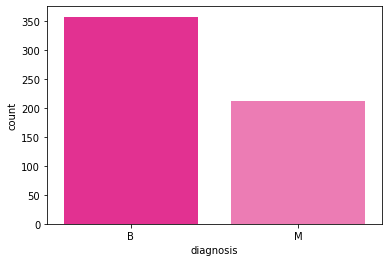

In [0]:
# Bar chart showing the number of benign and malignant tumours in the data set
sns.countplot(df['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(df['diagnosis']).iloc[:17].index)
plt.show()

In [0]:
# change the M and B in to 1s and 0s via label encoding
df['diagnosis'] = df['diagnosis'].astype('category')
df1 = df.copy()
#make clear m / b 

Diagnosis is a categorical variable, because it represents a fix number of possible values (i.e, Malignant, of Benign.) 

The machine learning algorithms wants numbers, and not strings, as their inputs so we need some method of coding to convert them



*   1 = Malignant
*   2 = Benign



In [0]:
df1['diagnosis'] = df1['diagnosis'].cat.codes
df1.head(5)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


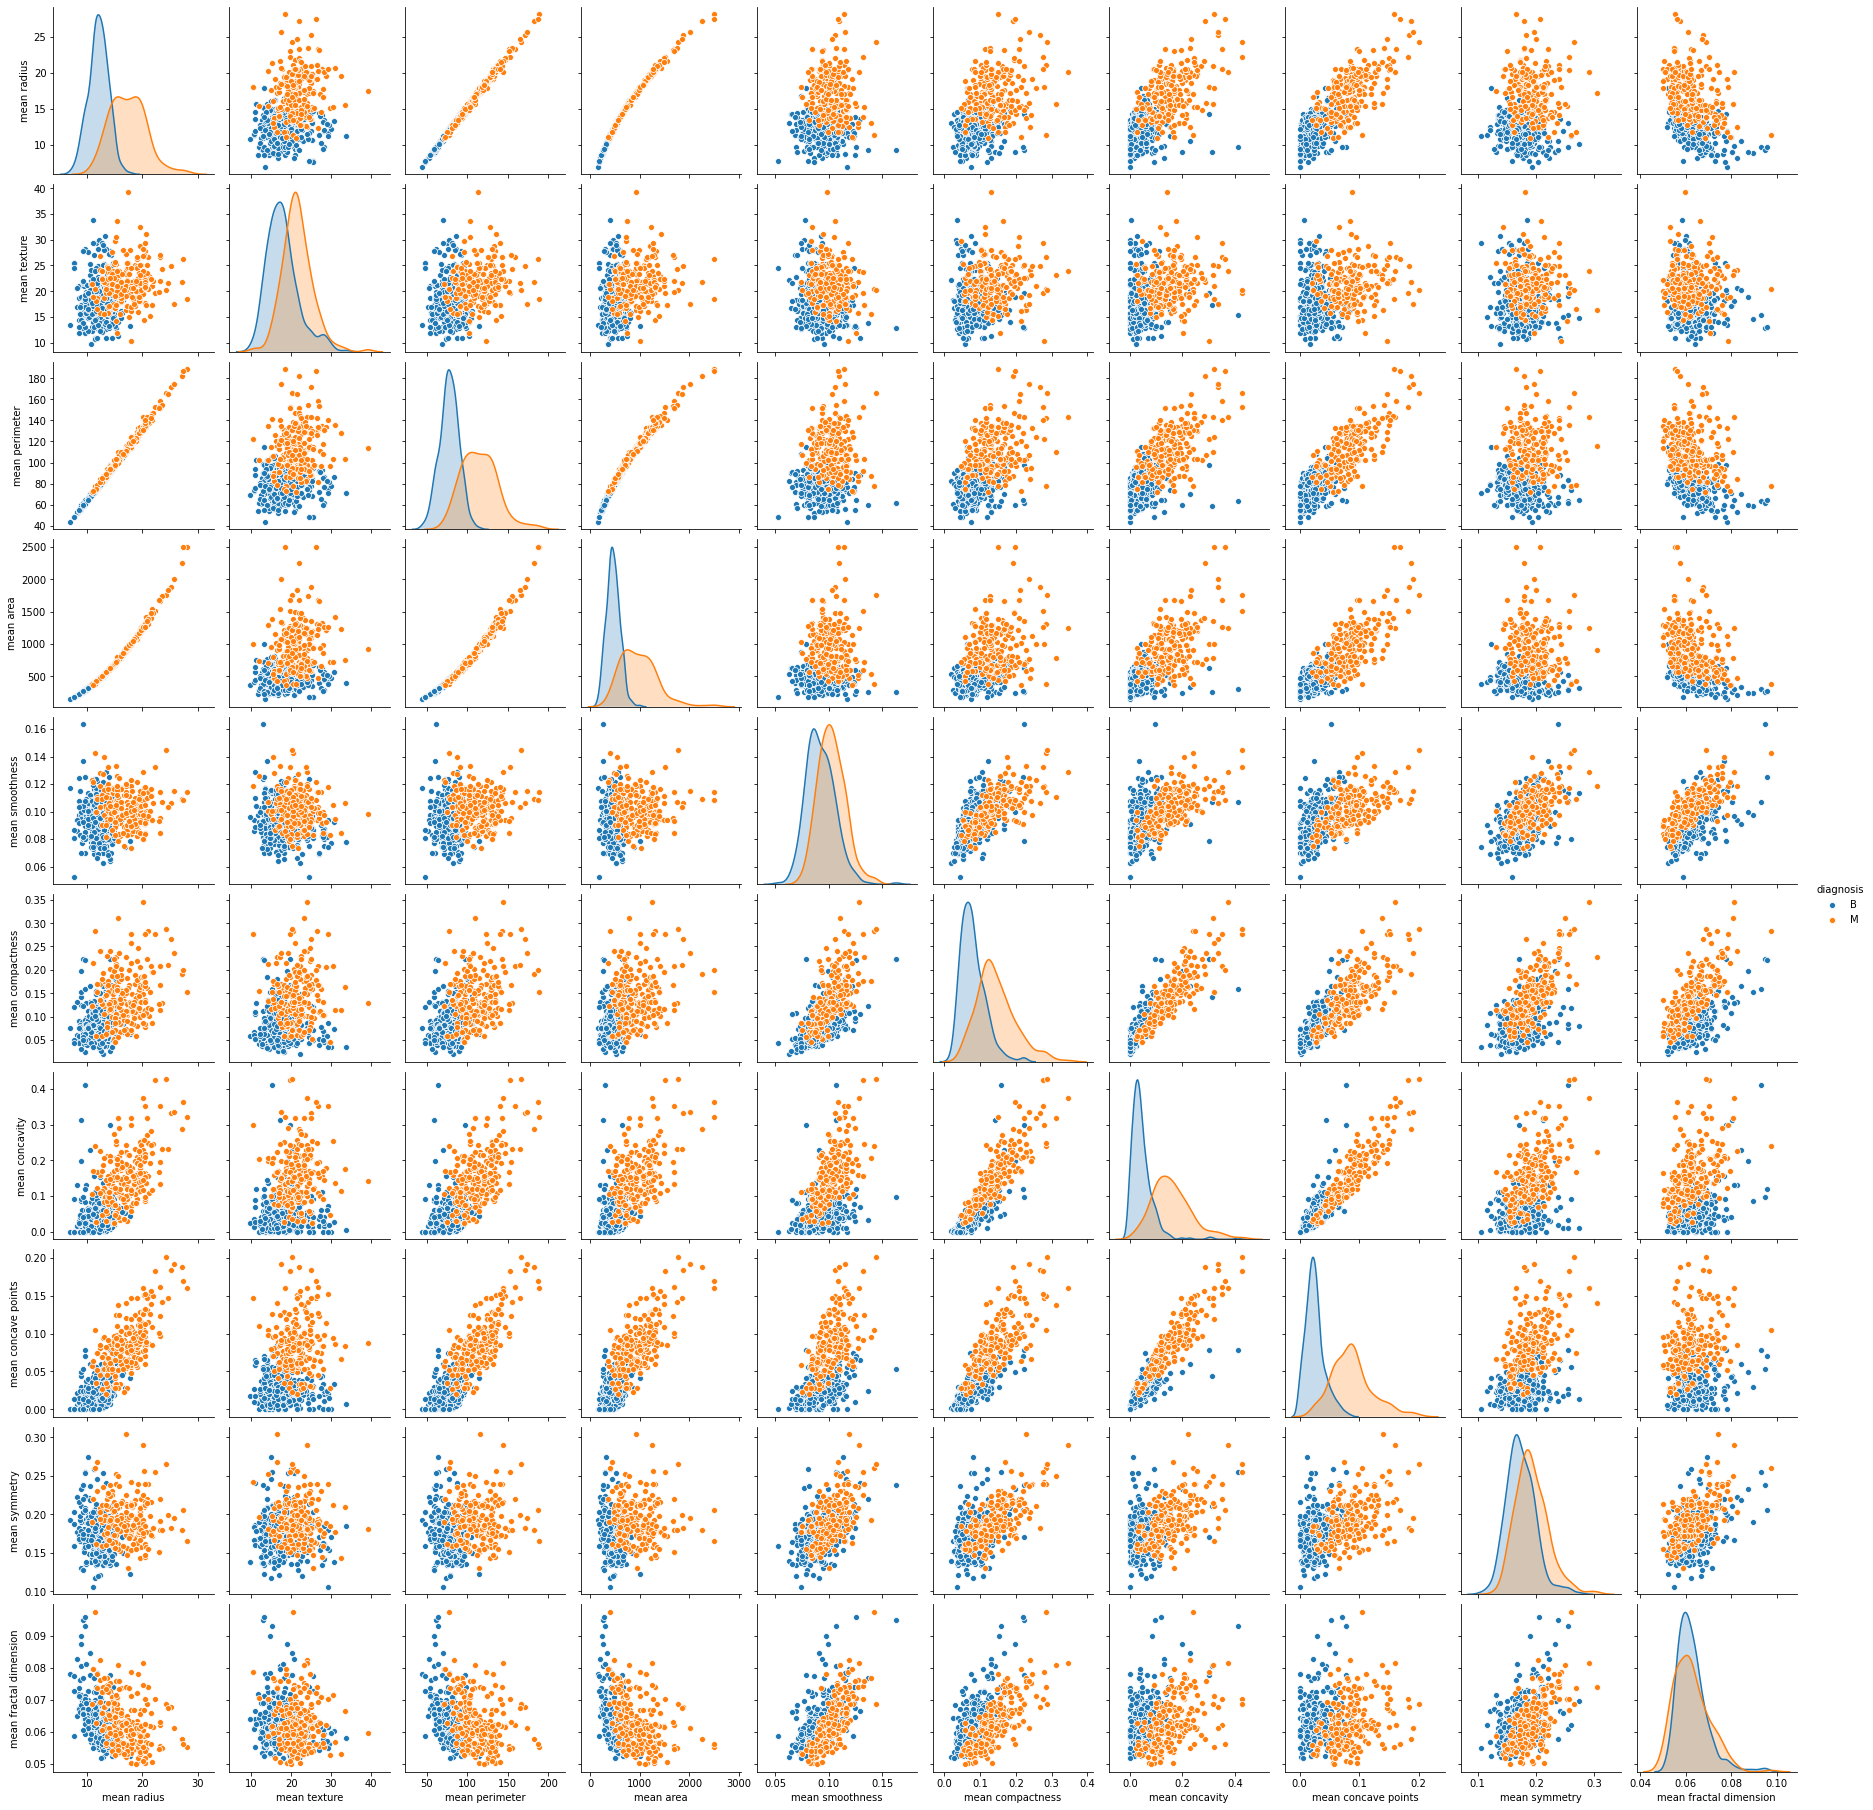

In [0]:
# here we can get an overview using pairplots
sns.pairplot(df.iloc[:,:11], hue = 'diagnosis')

**Observation:**

The radius, parameter and area are highly correlated, as well as compactness, concavity and concave point means. This is to be expected as these are features highly related to eachother

---



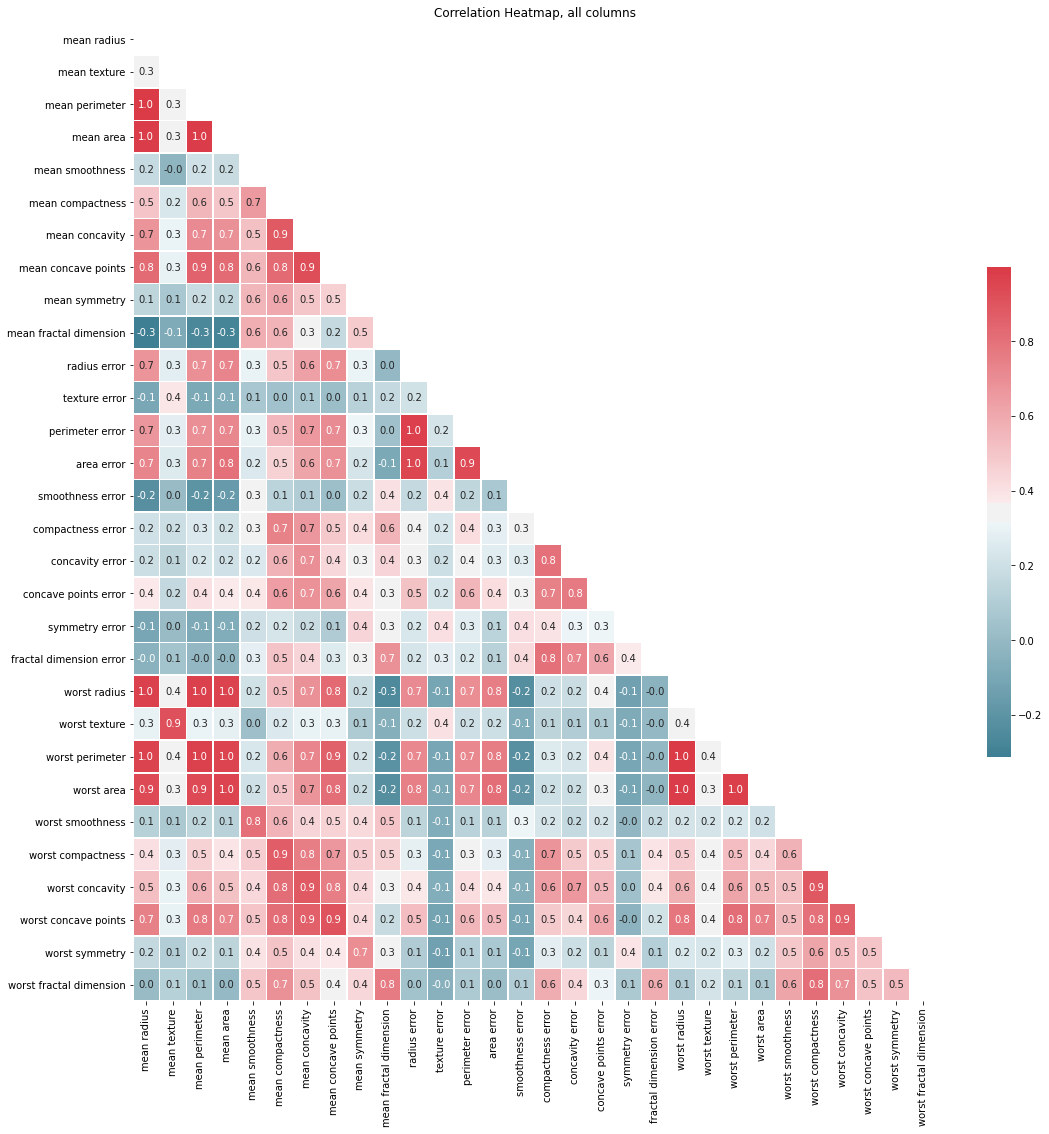

In [0]:
# Build a simpler and less saturated correlation matrix
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(corr, mask = mask, cmap = cmap, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap, all columns')
plt.savefig('df_corr_whole.png')

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


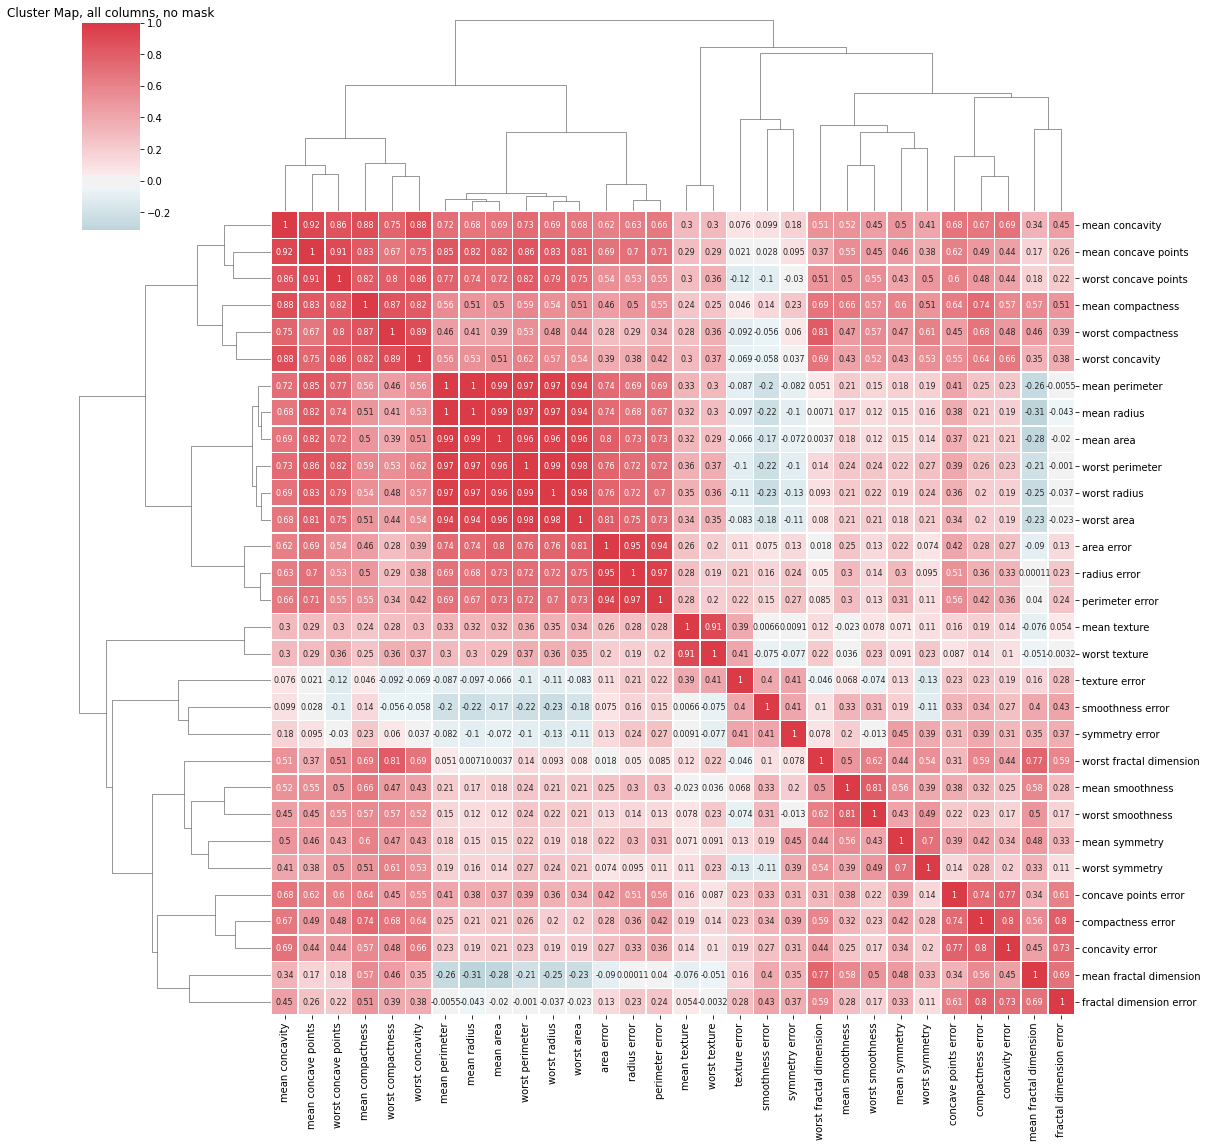

In [0]:
# Cluster Heatmap of the correlation matrix
sns.clustermap(corr, figsize = (16, 16), cmap=cmap, annot = True, annot_kws={'size':8}, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Cluster Map, all columns, no mask')
plt.savefig('df_cluster_whole_nmask.png')



---


This correlation heatmap takes into account it calculates the feature correlation with malignant cases and the feature correlation with Benign cases. An absolute value is derived thereby if there's a large positive number it means the correlation betweent the two features involved changes on the diagnosis.





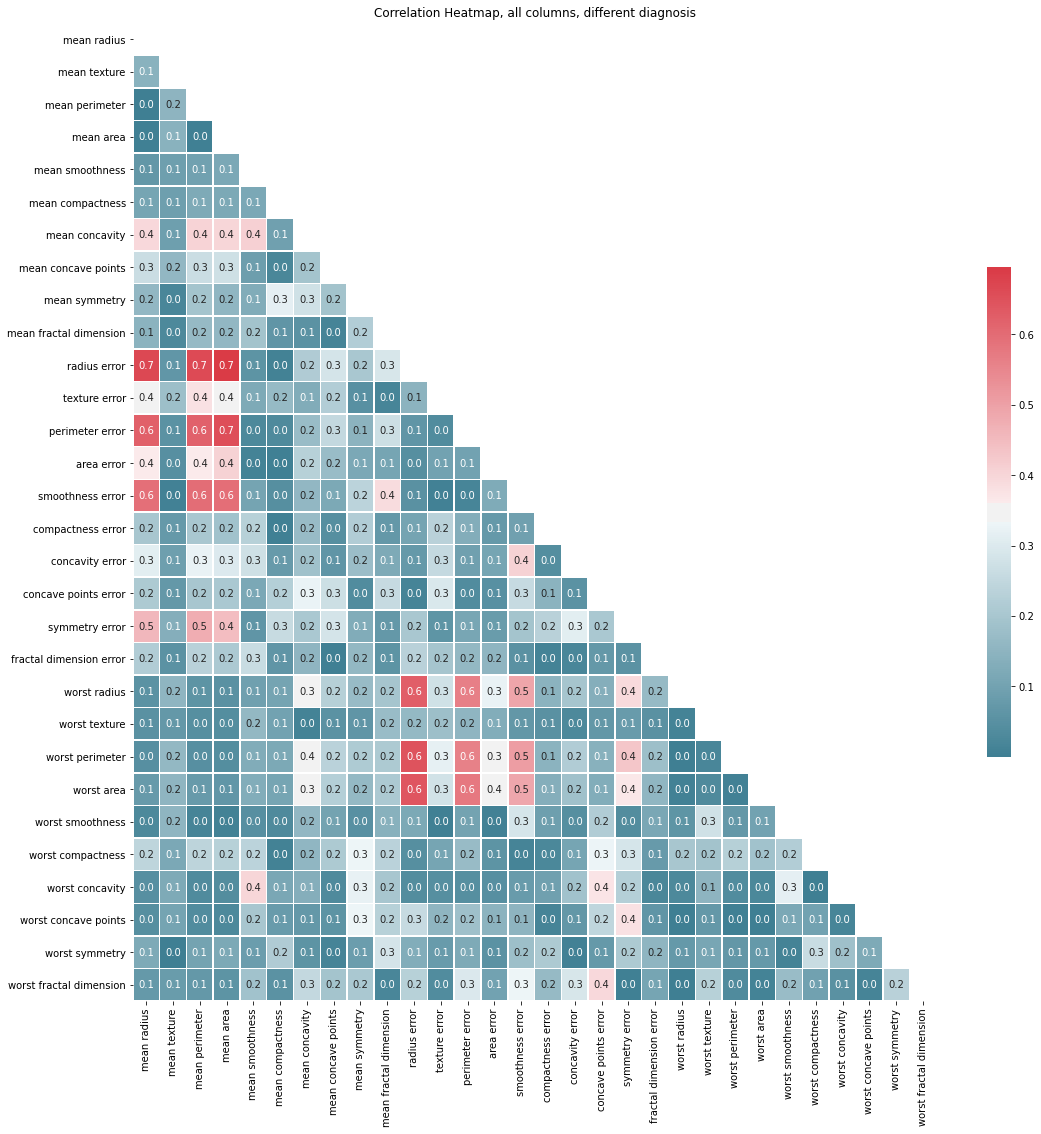

In [0]:
# Build a correlation difference matrix
corr_m = df[df['diagnosis'] == 'M'].corr()
corr_b = df[df['diagnosis'] == 'B'].corr()
corr_df = abs(corr_m - corr_b)
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(corr_df, cmap = cmap, mask = mask, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap, all columns, different diagnosis')
plt.savefig('df_corr_df.png')



---


A clearer heatmap

['mean radius', 'mean perimeter', 'mean area', 'radius error', 'perimeter error', 'smoothness error', 'worst radius', 'worst perimeter', 'worst area']


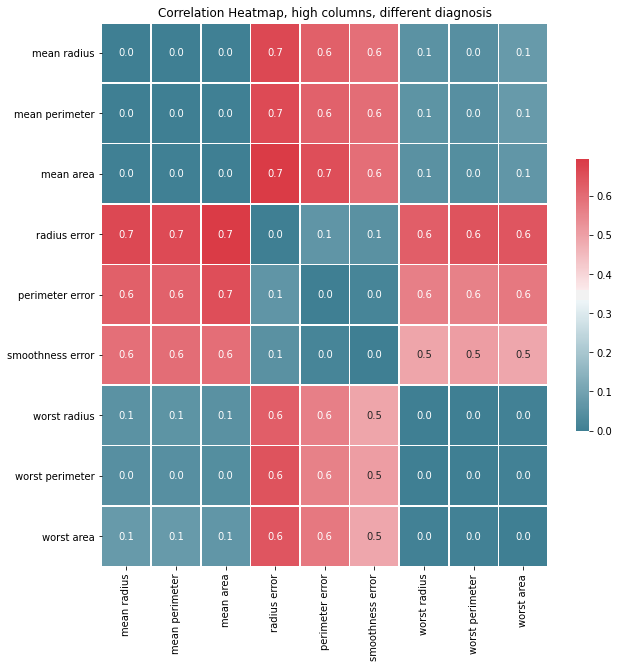

In [0]:
corr_df_high = corr_df[corr_df > 0.5] #Can change selection creteria
corr_df_high = corr_df_high.replace(1 , np.nan)
corr_df_high = corr_df_high.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)
columns_high_corr = list(corr_df_high.columns)
print(columns_high_corr)
corr_df_high_sel = corr_df[columns_high_corr].transpose()[columns_high_corr]

f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(corr_df_high_sel, cmap = cmap, annot= True,linewidths=0.5,fmt = ".1f",ax=ax, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap, high columns, different diagnosis')
plt.savefig('df_corr_df_high.png')

From this analysis we can obtain those features that are the most likely to vary depending on cell type

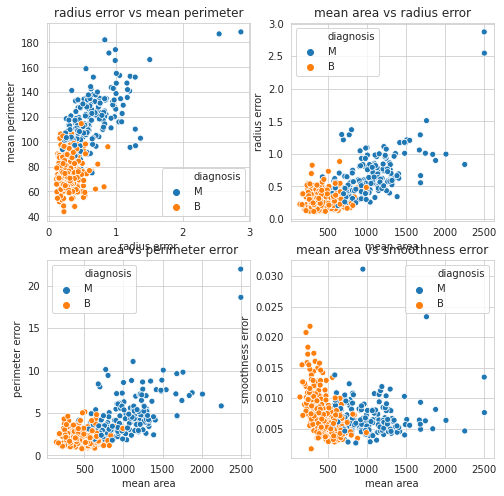

In [0]:
fig = plt.figure(figsize=(8,8))
def scatter_plot(input1,input2,k):
    plt.subplot(k)
    sns.scatterplot(x = df[input1], y = df[input2], hue = "diagnosis",
                    data = df)
    plt.title(input1 + ' vs ' + input2)
    k+=1

scatter_plot('radius error','mean perimeter',221)   
scatter_plot('mean area','radius error',222)   
scatter_plot('mean area','perimeter error',223)   
scatter_plot('mean area','smoothness error',224)

**Chapter 3: Scaling**

Now we split the data into independent (X) and dependent (Y) categories. Y will tell us if the patient has a malignant or benign tumour and X is going to tell us the features that will help us determine if the patient's tumour is malignant or benign.


In [0]:
# The data we use is split into training data and test data. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.iloc[:, 1:31]
Y = df.iloc[:, 0]

The training data is known for the model to learn from. The test data is to test the predictions. Here we split the data into 75% training and 25% testing. 

Before we get started on the model selection we need to make sure the orders of magnitude are consistent for all data sets. This is really important in machine learning and is one of the most critical steps in the pre-processing stage of creating a model. This is especially important in K-nearest neighbours models which we will touch on later. 

In [0]:
#Define a function to create train/test data with features and test_size input.
#X is the features, Y is the categorical output; both dataframe
#drop_column, a list of columns to be drpped
#test_size, % of original dataset used as the test set
#output dset is a list of dataframes
def Dataset(X, Y, drop_column = [], test_size = 0.25):
  if len(drop_column) != 0:
    X = X.drop(drop_column, axis = 1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = 0)
  #Scaling
  X_train = pd.DataFrame(sc.fit_transform(X_train), columns= X.columns)
  X_test = pd.DataFrame( sc.transform(X_test), columns = X.columns)
  dset = [X_train, X_test, Y_train, Y_test]
  return dset

**Chapter 4:** **Models** 

4.1 Model Selection

When deciding if a problem involves a regression or classification model the first thing you should decide is is your target variable a quantity, a probability of a binary category or a label? If it is a quantity or probability then you should use a regression model. Otherwise you should consider a classification model. In this project we have labels for the different diagnostics of the tumor, whether is is malignant or benign. So here we use classification models.

4.1.1 Logistic Regression

Logistic regression is a popular algorithm to solve a classification problem. It is a simple model for binary dependent variables, so when the label falls into one of two categories (i.e. Malignant or Benign in our case). It models the probablility that Y belongs to a particular category. Here it is a good model to use as the output is easy to interpret and it works where we have a clear hypothesis about what to solve, so in our situation whether it is cancerous or not. Although the name makes it sound like a regression model it is called this as its underlying technique is the same as linear regression.

In [0]:
from sklearn.linear_model import LogisticRegression

def LR_f(X_train, Y_train):
  LR = LogisticRegression(random_state = 0)
  LR.fit(X_train, Y_train)
  return LR

4.1.2 Decision Tree

Decision trees are a systematic approach to create a model that predicts the value of the chosen target variable (i.e. Malignant or Benign) by learning some simple decision rules inferred from the data features for example the area, smoothness and concavity of the tumour. These features make it a good model for this project. 

In [0]:
from sklearn.tree import DecisionTreeClassifier

def DTC_f(X_train, Y_train):
  DTC = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
  DTC.fit(X_train, Y_train)
  return DTC

4.1.3 Random Forest

Random Forest consists of a large number of individual decision trees acting together as an ensemble. They perform very well for classification and do not need selecting the features beforehand. This works in that a large number of trees operating together will outpreform the individual models. 

In [0]:
from sklearn.ensemble import RandomForestClassifier

def RFC_f(X_train, Y_train, n_estimators = 5):
  RFC = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0)
  RFC.fit(X_train, Y_train)
  return RFC

4.1.4 Support Vector Machines

Support Vector Machines (SVMs) are a set of supervised learning methods. The objective is to find a hyperplane in an N-demensional space that can distinctly classify the data points. 

In [0]:
from sklearn.svm import SVC

def SVC_f(X_train, Y_train):
  SV = SVC(kernel = 'linear',random_state = 0)
  SV.fit(X_train, Y_train)
  return SV

4.1.5 Nearest Neighbour 

K-Nearest neighbour is generally used for data which can cluster well as it assumes that similar things exist in close proximity. It might not be very effective for classifications of more complex decision boundaries. In this example you can say that this is a malignant cell, because it looks similar to those k other malignant cells

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def NN_f(X_train, Y_train, n_neighbors = 5):
  NN = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'minkowski', p = 2)
  NN.fit(X_train, Y_train)
  return NN


4.1.6 Other Models

We considered using a Naive Bayes model. This has the assumption that different features are totally uncorrelated, which seems not to be the case for this problem as we have correctly identified in the Data Evaluation section above, hence we decided against it.

4.2 Functions

4.2.1 Function Dict

Next we define a dictionary containing each of these models. We also define a function used in training the models. 

In [0]:
# dictionary definition
SKL_func = {
    'LR': LR_f,
    'DTC': DTC_f,
    'RFC': RFC_f,
    'SVC': SVC_f,
    'NN': NN_f
}
Model = list(SKL_func.keys())

4.2.2 Function with variable

In [0]:
#m: model name, choose from list 'Model'
#model_op: a dictionary to store the trained models, if not desired, type {}
#DSet: dataset containing X_train, X_test, Y_train, Y_test dataframes
#Output a list of train score and test score with 4 decimal points accuracy

def train_model_score(m, model_op, DSet, test_size = 0.25):
  [X_train, X_test, Y_train, Y_test] = DSet
  model_op[m] = SKL_func[m](X_train, Y_train)
  train_score = format(model_op[m].score(X_train, Y_train), '.4f')
  test_score = format(model_op[m].score(X_test, Y_test), '.4f')  
  return [train_score, test_score]

**Chapter 5: Model Evaluation

5.1.1 Base case scenario - Compare the five models


We validated our models by comparing the accuaracy between them.
 

In [0]:
#Testing if the output works
 DSet = Dataset(X, Y)
 [X_train, X_test, Y_train, Y_test] = DSet


In [0]:
SKL_score_base = {
}
#result [train set accuracy, test set accuracy]
trained_models_base = {
}

In [0]:
for m in Model:
  SKL_score_base[m] = train_model_score(m, trained_models_base, DSet)

In [0]:
SKL_score_base

{'DTC': ['1.0000', '0.9580'],
 'LR': ['0.9906', '0.9580'],
 'NN': ['0.9742', '0.9510'],
 'RFC': ['0.9906', '0.9510'],
 'SVC': ['0.9859', '0.9720']}

In [0]:
#Models Output
trained_models_base.values()

dict_values([LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                   

5.1.2 Confusion Matrix

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification based on the true classes. It is a method of determining the accuracy of the models.

In [0]:
# use a confusion matrix to test model accuracy

from sklearn.metrics import confusion_matrix
def Confusion_f (model_op):
  Accuracy_Op = {}
  for m in model_op.keys():
    conf_matrix = confusion_matrix(Y_test, model_op[m].predict(X_test))
    print(conf_matrix)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FN = conf_matrix[1][0]
    FP = conf_matrix[0][1]
    Accuracy_Op[m] = (TP + TN)/(TP + TN + FP + FN)
    print(str(m) + ' Accuracy = ', (TP + TN)/(TP + TN + FP + FN))

  return
  

In [0]:
Confusion_f(trained_models_base)

[[87  3]
 [ 3 50]]
LR Accuracy =  0.958041958041958
[[86  4]
 [ 2 51]]
DTC Accuracy =  0.958041958041958
[[84  6]
 [ 1 52]]
RFC Accuracy =  0.951048951048951
[[88  2]
 [ 2 51]]
SVC Accuracy =  0.972027972027972
[[89  1]
 [ 6 47]]
NN Accuracy =  0.951048951048951


5.1.3 Classification Report

This is a package from sklearn to give an alternate classification report

The precision is the ratio tp / (tp + fp) 

The recall is the ratio tp / (tp + fn)

The f1-score as a weighted average of the precision and recall,

The support is the number of occurrences of each class in the target variables 

In [0]:
# Another method
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Logistic Regression")
print(classification_report(Y_test, trained_models_base['LR'].predict(X_test)))
print("Decision Tree")
print(classification_report(Y_test, trained_models_base['DTC'].predict(X_test)))
print("Random Forest")
print(classification_report(Y_test, trained_models_base['RFC'].predict(X_test)))
print("Standard Vector Machine")
print(classification_report(Y_test, trained_models_base['SVC'].predict(X_test)))
print("K-Nearest Neighbour")
print(classification_report(Y_test, trained_models_base['NN'].predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        90
           M       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Decision Tree
              precision    recall  f1-score   support

           B       0.98      0.96      0.97        90
           M       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Random Forest
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        90
           M       0.90      0.98      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95   

In [0]:
# print('Accuracy for Logistic Regression Training Data : {:.3f}'.format(Log_Reg_Model.score(X_train,Y_train)))
# print('Accuracy for Logistic Regression Testing Data : {:.3f}'.format(Log_Reg_Model.score(X_test,Y_test)))

5.2 Logistic Regression - Various Test Size

In [0]:
Size_List = np.arange(0.10, 0.35, 0.025)
SKL_score_var_size = {
}

In [0]:
for i in Size_List:
  DSet_1 = Dataset(X, Y, test_size= i)
  i_s = 'LR' + str(float("{:.3f}".format(i)))
  SKL_score_var_size[i_s] = train_model_score('LR', {}, DSet = DSet_1)

In [0]:
SKL_score_var_size

{'LR0.1': ['0.9863', '1.0000'],
 'LR0.125': ['0.9859', '1.0000'],
 'LR0.15': ['0.9855', '1.0000'],
 'LR0.175': ['0.9872', '0.9800'],
 'LR0.2': ['0.9890', '0.9649'],
 'LR0.225': ['0.9909', '0.9535'],
 'LR0.25': ['0.9906', '0.9580'],
 'LR0.275': ['0.9903', '0.9745'],
 'LR0.3': ['0.9899', '0.9766'],
 'LR0.325': ['0.9896', '0.9784']}

**0.2 test size yields best reults**

5.3 Logistic Regression - Feature Selection


In [0]:
# X = df.iloc[:, 1:30]
# Y = df.iloc[:, 0]

Filter method: Univariate; dimension reduction with correlated features 

In [0]:
#Univariate filtering: Kendall's Tau for numerical input and categorical output
corr_1 = df1.corr(method = 'kendall')
drop_uni = corr_1['diagnosis'].sort_values(ascending = False)
drop_columns_uni = drop_uni[abs(drop_uni[:]) < 0.1].index

In [0]:
drop_uni

diagnosis                  1.000000
worst perimeter            0.650879
worst radius               0.644195
worst area                 0.643117
worst concave points       0.639090
mean concave points        0.635873
mean perimeter             0.611775
mean area                  0.599992
mean concavity             0.599449
mean radius                0.599082
area error                 0.583722
worst concavity            0.576907
perimeter error            0.515243
radius error               0.504197
mean compactness           0.497971
worst compactness          0.495958
concave points error       0.399546
worst texture              0.389654
concavity error            0.384486
mean texture               0.377644
worst smoothness           0.347952
worst symmetry             0.324380
compactness error          0.311115
mean smoothness            0.304033
mean symmetry              0.271924
worst fractal dimension    0.254571
fractal dimension error    0.164674
texture error              0

In [0]:
DSet_kendall = Dataset(X, Y, drop_column= drop_columns_uni)[0]
train_model_score('LR', {}, DSet_kendall)

ValueError: ignored

Base:  'LR': [0.9906103286384976, 0.9440559440559441]

In [0]:
print(DSet_kendall[0].shape)
print(drop_columns_uni)

Wrapper method: Recursive feature elimination

In [0]:
from sklearn.feature_selection import RFE

def RFE_selection(X, Y, X_trans, r_min = 24, r_max = 30, drop_columns = []):
  removed_feat_dict = {}
  selector = {}
  if len(drop_columns) > 0 :
    X_trans = X_trans.drop(drop_columns, axis = 1)
  for i in range(r_min, r_max):
    print(i)
    estimator = LogisticRegression(random_state=0)
    selector = RFE(estimator, i , step=1)
    selector_op = selector.fit(X_trans, Y)
    selector_op.support_
    removed_feat_dict[str(i)] = list(X_trans.columns[(selector_op.support_ == False)])
    DSet_rfe = Dataset(X, Y, drop_column = removed_feat_dict[str(i)])[0]
    print(train_model_score('LR', {}, DSet_rfe))
  return removed_feat_dict

with / without drop columns 

In [0]:
removed_feat_dict = RFE_selection(X, Y, X_trans)

In [0]:
removed_feat_dict

In [0]:
removed_feat_dict = RFE_selection(X, Y, X_trans, drop_columns = drop_columns_uni)

In [0]:
removed_feat_dict

Embedded method feature filtering - Lasso

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def Lasso_selection(X, Y, X_trans):
  # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
  # X_train = sc.fit_transform(X_train)
  # X_trans = sc.transform(X)
  sel_ = SelectFromModel(LogisticRegression(C=100, penalty='l1', solver = 'liblinear', max_iter= 10000))
  #Identifying important features with whole dataset (?)
  sel_.fit(X_trans, Y)
  selected_feat = X.columns[(sel_.get_support())]
  removed_feat = X.columns[(sel_.get_support() == False)]
  return removed_feat

In [0]:
removed_feat = Lasso_selection(X, Y, X_trans)
print('selected features: {}'.format(len(removed_feat)))

In [0]:
removed_feat

In [0]:
DSet_Lasso = Dataset(X, Y, drop_column= removed_feat)[0]
train_model_score('LR', {}, DSet_Lasso)

 'LR0.25': [0.9906103286384976, 0.9440559440559441],

'Univariate': [0.9906103286384976, 0.958041958041958]

 Embedded: [0.9906103286384976, 0.958041958041958]

**Chapter 6 Conclusion**

insert conclusion summary text